Cargamos librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos dataset

In [3]:
ruta=r"C:\Users\CixoY\Downloads\Datos+Meteorológicos_Arg_2023.csv"
df=pd.read_csv(ruta)

Lo visualizamos

In [4]:
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


Normalizamos datos

In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')


Funciones clave

--- Ciudades disponibles ---
- Buenos Aires
- Cordoba
- Rosario
- Mendoza
- Tucuman


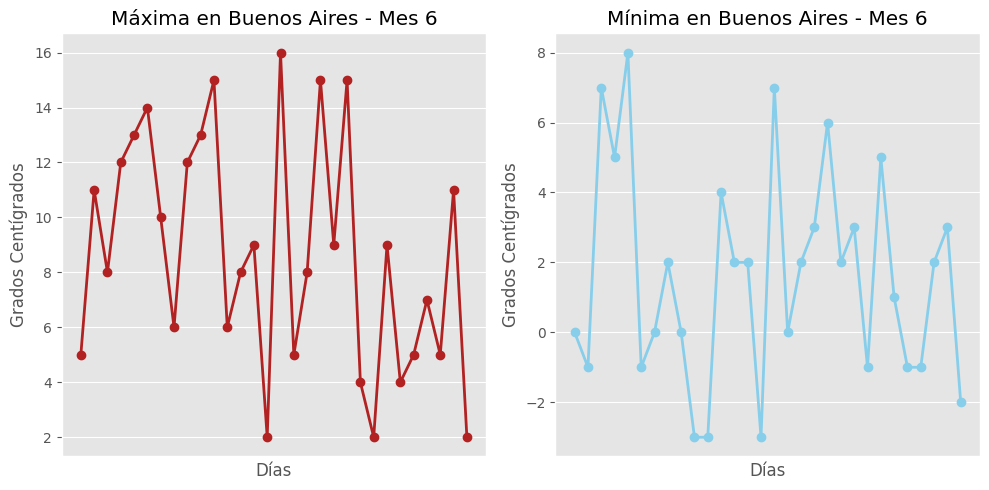

In [6]:
def seleccion_ciudad(df):
    print("--- Ciudades disponibles ---")
    ciudades = df['Ciudad'].unique()
    for ciudad in ciudades:
        print(f"- {ciudad}")
    
    seleccion = input("\n¿Qué ciudad querés, capo?: ")
    
    if seleccion in ciudades:
        return seleccion
    else:
        print("Esa ciudad no está en la lista.")
        return None

def seleccion_mes():
    mes = input('Elegí el número del mes (ej: 1 para Enero): ')
    return int(mes)

def graficar_temperatura(df, ciudad_elegida, mes_elegido):
    plt.style.use('ggplot')
    
    # Filtramos el DataFrame
    filtro = (df['Ciudad'] == ciudad_elegida) & (df['Fecha'].dt.month == mes_elegido)
    datos_filtrados = df[filtro]

    if datos_filtrados.empty:
        print("No hay datos para esa selección.")
        return

    # Creamos los subplots
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    ax1 = axs[0]
    ax2 = axs[1]

    # --- GRÁFICO 1: Máxima (LÍNEA) ---
    # CAMBIOS: Quitamos width/edgecolor. Usamos linewidth y marker (puntos)
    ax1.plot(datos_filtrados['Fecha'], datos_filtrados['Temperatura Maxima'], 
             color='firebrick', linewidth=2, marker='o') 
    
    ax1.set_title(f'Máxima en {ciudad_elegida} - Mes {mes_elegido}')
    ax1.set_xticks([]) 
    ax1.set_xlabel('Días') 
    ax1.set_ylabel('Grados Centígrados') 

    # --- GRÁFICO 2: Mínima (LÍNEA) ---
    # CAMBIOS: Igual aquí. Usamos color celeste ('skyblue')
    ax2.plot(datos_filtrados['Fecha'], datos_filtrados['Temperatura Minima'], 
             color='skyblue', linewidth=2, marker='o')
    
    ax2.set_title(f"Mínima en {ciudad_elegida} - Mes {mes_elegido}")
    ax2.set_xticks([]) 
    ax2.set_xlabel('Días') 
    ax2.set_ylabel('Grados Centígrados') 

    plt.tight_layout()
    plt.show()

  

# --- BLOQUE PRINCIPAL PARA EJECUTAR ---
ciudad = seleccion_ciudad(df)
if ciudad:
    mes = seleccion_mes()
    graficar_temperatura(df, ciudad, mes)